<a href="https://colab.research.google.com/github/wurifah/Bisaai/blob/main/regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresi Harga Rumah

Dibawah ini adalah proses regresi dari data harga penjualan rumah. Regresi dilakukan terhadap suatu dataset. Setelah proses regresi akan dilakukan prediksi berdasarkan model regresi yang telah dilakukan

In [108]:
# Import library yang dibutuhkan

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
#pembacaan dataset

df = pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [110]:
df.shape

(21613, 21)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [112]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [113]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Diatas adalah dataset mengenai harga penjualan rumah. Terdapat 21613 baris atau penjualan dan 21 kolom. 21 kolom tersebut adalah:
1. id : kode penjualan rumah
2. date : tanggal saat rumah terjual
3. price: harga rumah
4. bedrooms : jumlah kamar tidur
5. bathrooms : jumlah kamar mandi
6. sqft_living : luas persegi bangunan rumah dalam satuan foot atau kaki
7. sqft_lot : luas persegi tanah dalam satuan foot atau kaki
8. floors: jumlah lantai rumah
9. waterfront : bagian ini menunjukkan apakah rumah memiliki pemandangan ke laut atau tidak. 1 untuk ya dan 0 untuk tidak
10. view : bagian ini menunjukkan apakah rumah sudah pernah dilihat atau belum. 1 untuk sudah dan 0 untuk belum
11. condition : bagian ini menunjukkan kondisi rumah dengan skala 1 sampai 5
12. grade : bagian ini menunjukkan nilai keseluruhan yang diberikan kepada unit perumahan, berdasarkan sistem penilaian King County dalam skala 1 hingga 11
13. sqft_above : bagian ini menunjukkan luas persegi rumah selain ruang bawah tanah.
14. sqft_basement : bagian ini menunjukkan luas persegi ruang bawah tanah rumah.
15. yr_built : tahun pembangunan rumah
16. yr_renovated : tahun renovasi rumah
17. zipcode : kode pos lokasi rumah
18. lat : bagian ini menunjukkan garis lintang lokasi rumah
19. long : bagian ini menunjukkan garis bujur lokasi rumah
20. sqft_living15 : luas ruang tamu pada tahun 2015 dengan beberapa renovasi
21. sqft_lot15 : lot ukuran area pada tahun 2015 dengan beberapa renovasi

Disini kita tidak akan memasukkan data id, date dan zipcode. Regresi dilakukan dengan price sebagai variabel dependen dan semua variabel selain yang sudah disebutkan merupakan variabel independen.

In [114]:
df.drop(columns = 'id', inplace = True)
df.drop(columns = 'date', inplace = True)
df.drop(columns = 'zipcode', inplace = True)

In [115]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## Visualisasi Data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


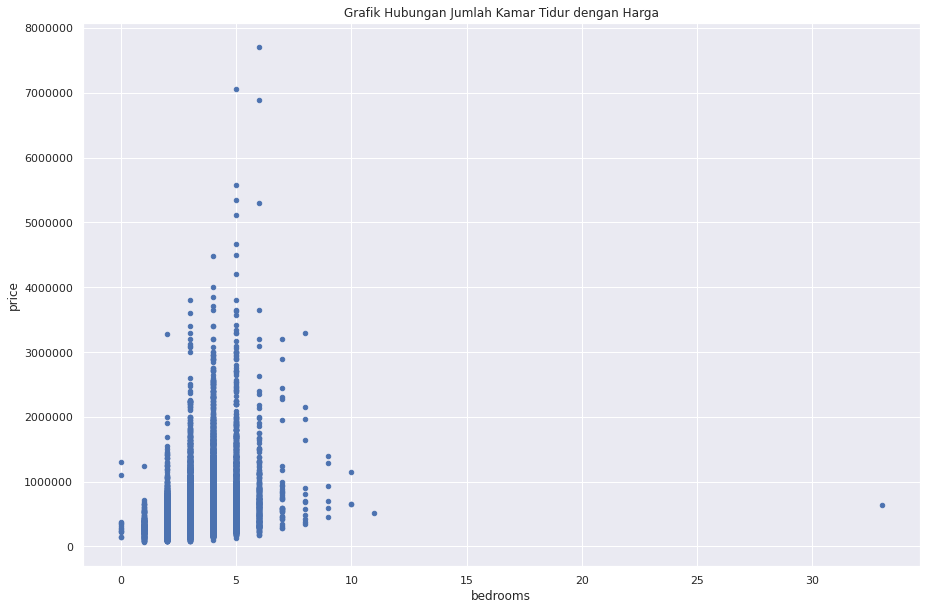

In [13]:
sns.set()
df.plot(x='bedrooms',y='price', kind = 'scatter',figsize=(15,10))
plt.title('Grafik Hubungan Jumlah Kamar Tidur dengan Harga')
plt.ticklabel_format(style='plain')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


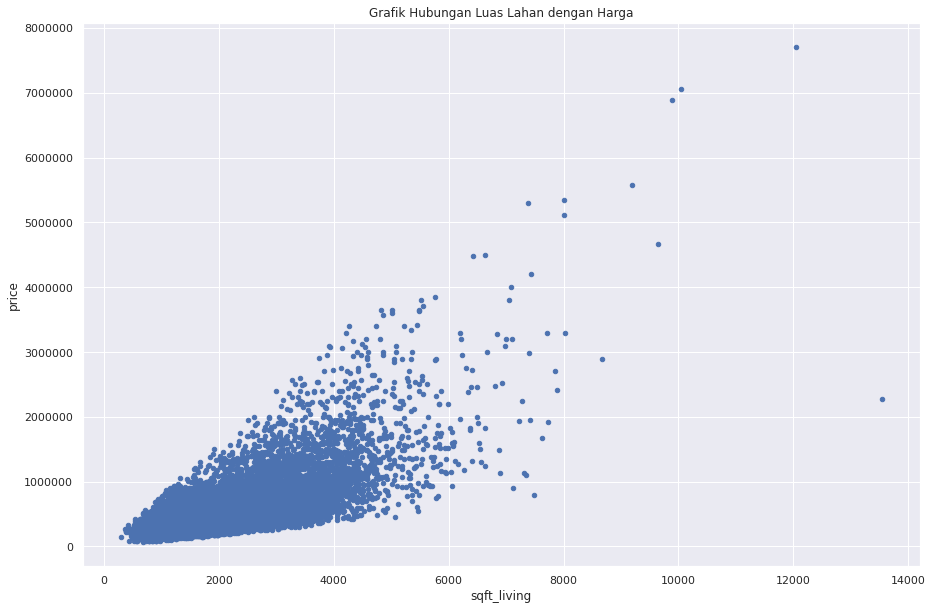

In [15]:
sns.set()
df.plot(x='sqft_living',y='price', kind = 'scatter',figsize=(15,10))
plt.title('Grafik Hubungan Luas Lahan dengan Harga')
plt.ticklabel_format(style='plain')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


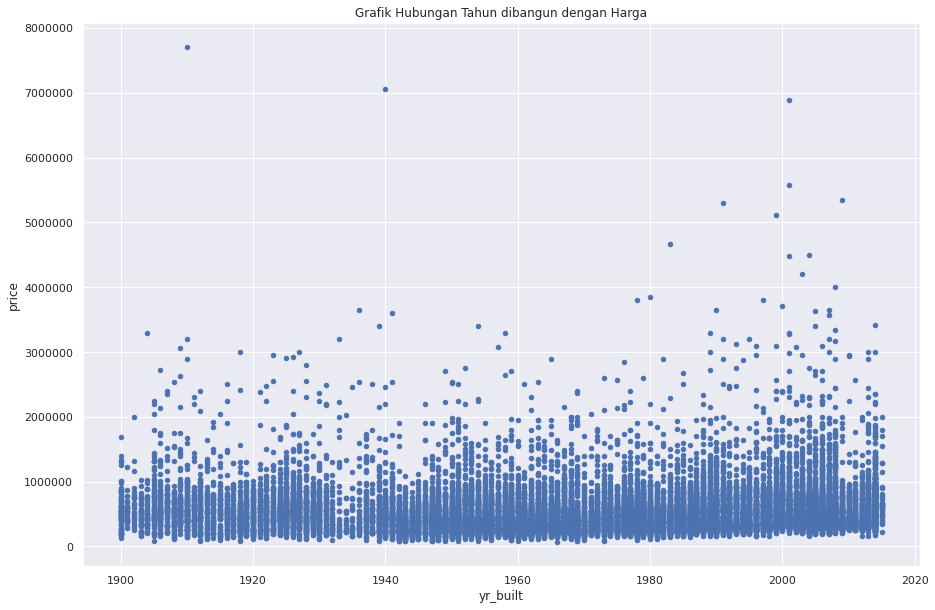

In [16]:
sns.set()
df.plot(x='yr_built',y='price', kind = 'scatter',figsize=(15,10))
plt.title('Grafik Hubungan Tahun dibangun dengan Harga')
plt.ticklabel_format(style='plain')
plt.show()

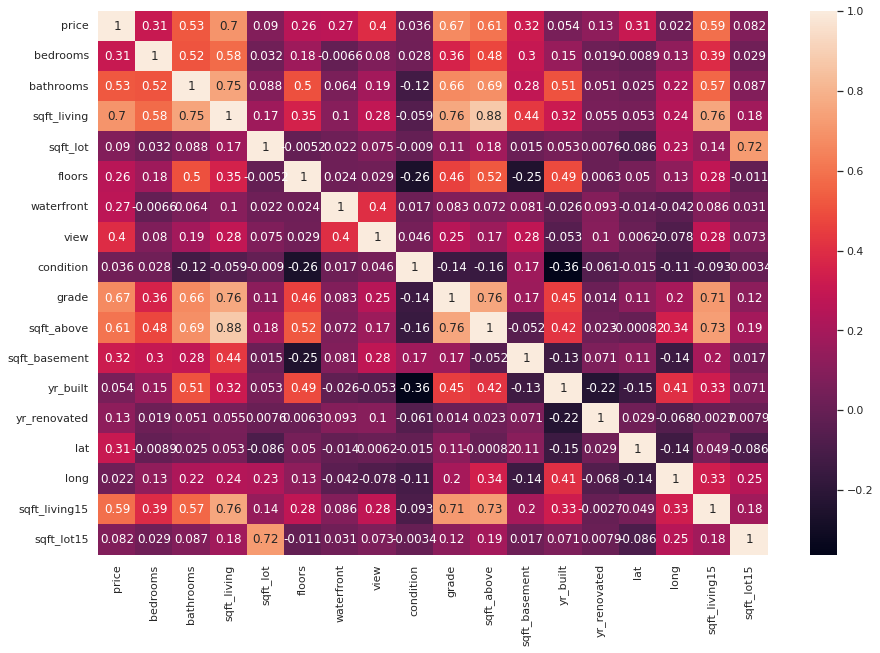

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

Berdasarkan grafik heatmap, variabel yang mempunyai pengaruh besar terhadap pertambahan harga rumah adalah variabel sqft_living, grade, sqft_above dan sqft_living15 yaitu mencapai lebih dari 0,5.

Dari data diatas juga terlihat adanya outlier (pada grafik jumlah kamar, terdapat kamar dengan jumlah lebih dari 30). Maka kita akan hilangkan data tersebut

In [116]:
mean = df['bedrooms'].mean()
std = df['bedrooms'].std()
limit = 3*std
limit_atas = mean + 3*std
limit_bawah = mean - 3*std

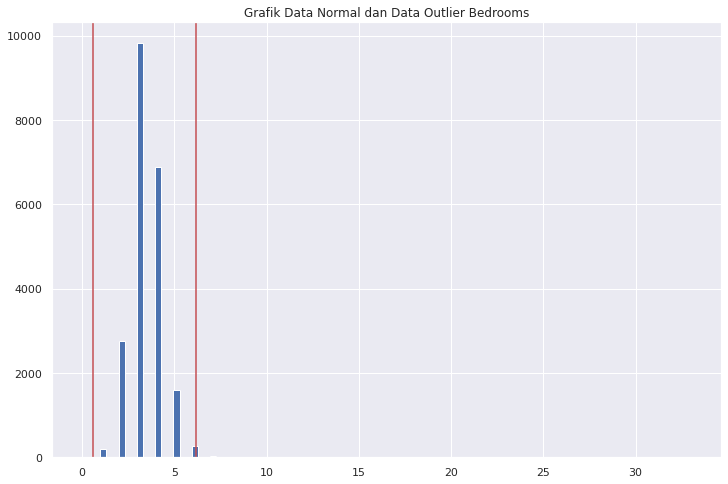

In [117]:
# plotting data normal dari bedroom dan outliernya

fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['bedrooms'], bins=100)

ax.axvline(limit_atas, color='r')
ax.axvline(limit_bawah, color='r')
plt.title('Grafik Data Normal dan Data Outlier Bedrooms')
plt.show()

Data normal adalah data diantara dua garis merah. Diluar garis tersebut adalah data outlier

In [118]:
df2 = df[(df['bedrooms']>limit_bawah)&(df['bedrooms']<limit_atas)]
df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


Diatas adalah data baru tanpa outlier

## Preprocessing

Data akan dibagi kedalam data training dan data testing dengan 25% data testing dan 75% data training

In [119]:
from sklearn.model_selection import train_test_split

# membuat variabel x dan y
x = df2.drop(columns='price')
y = df2['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 15)

print(f"Jumlah data training: {train.shape[0]}")
print(f"Jumlah data testing: {test.shape[0]}")

Jumlah data training: 16209
Jumlah data testing: 5404


## Data modelling

Proses regresi akan dilakukan dengan menggunakan beberapa model yaitu *Regresi Linear, Decision Tree, Random Forest dan Deep Neural Network*. Setelah melakukan proses modelling, akan dilakukan proses evaluasi performa meliputi nilai *Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), R Squared Score (R^2) dan Mean Absolute Error*

1. Mean Squared Error (MSE)

*   MSE adalah pengukuran rata-rata kuadrat kesalahan atau selisih kuadrat rata-rata antara nilai prediksi dan nilai sebenarnya.

   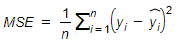
  
   Nilai MSE ini dapat diakarkan menjadi nilai Root Mean Squared Error atau RMSE

2. Mean Absolute Percentage Error (MAPE)


*   MAPE adalah pengukuran akurasi dalam bentuk persentase yang dapat dihitung sebagai kesalahan persen absolut rata-rata untuk setiap periode waktu dikurangi nilai aktual, dibagi dengan nilai aktual.

  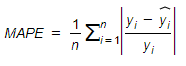

3. R Squared Score (R^2)


*   R^2 menjelaskan sejauh mana varians variabel A menjelaskan varians variabel B. Jadi jika R^2 bernilai 0,5 maka setengah varians variabel A dapat dijelaskan oleh varians variabel B

  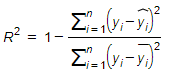

4. Mean Absolute Error (MAE)


*   MAE adalah perhitungan rata-rata dari kesalahan absolut

  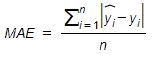





### Regresi Linear

In [120]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [121]:
lr_score = lr.score(x_test, y_test)
print('Model Accuracy Regresi Linear : ' , lr_score)

Model Accuracy Regresi Linear :  0.6956567883046243


In [122]:
lr_pred = lr.predict(x_test)

In [123]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

lr_mse = mean_squared_error(y_test.values, lr_pred)
lr_rmse = mean_squared_error(y_test.values, lr_pred,squared=False)
lr_mape = mean_absolute_percentage_error(y_test.values, lr_pred)
lr_mae = mean_absolute_error(y_test.values, lr_pred)
lr_r = r2_score(y_test.values, lr_pred)

print('Nilai Mean Squared Error             = {}'.format(lr_mse))
print('Nilai Root Mean Squared Error        = {}'.format(lr_rmse))
print('Nilai Mean Absolute Percentage Error = {}'.format(lr_mape))
print('Nilai Mean Absolute Error            = {}'.format(lr_mae))
print('Nilai R2                             = {}'.format(lr_r))

Nilai Mean Squared Error             = 37982530173.57949
Nilai Root Mean Squared Error        = 194891.07258563561
Nilai Mean Absolute Percentage Error = 0.25207005697910123
Nilai Mean Absolute Error            = 123176.29247156858
Nilai R2                             = 0.6956567883046243


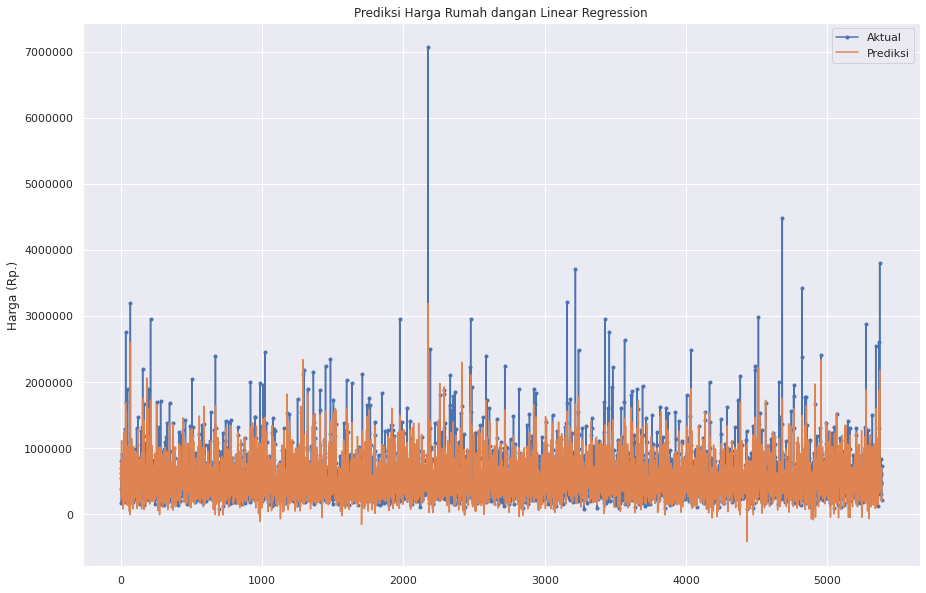

In [124]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), lr_pred.flatten(), label="Prediksi")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Rumah dangan Linear Regression')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

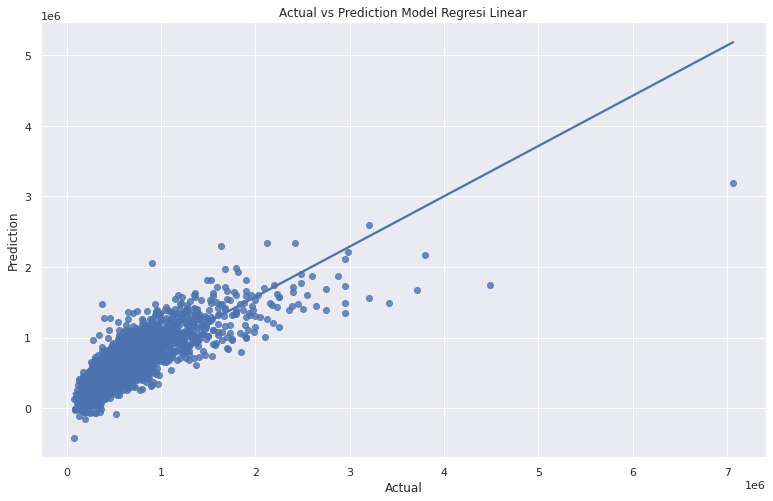

In [125]:
plt.figure(figsize = (13,8))
sns.regplot(x=y_test, y=lr_pred, ci=None)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs Prediction Model Regresi Linear')
plt.show()

In [126]:
hasil_prediksi = pd.DataFrame()
hasil_prediksi['Aktual'] = y_test.values.flatten()
hasil_prediksi['Linear Regression'] = lr_pred.flatten()
hasil_prediksi['Linear Regression'] = hasil_prediksi['Linear Regression'].round(0)
hasil_prediksi.head(5)

,Aktual,Linear Regression
0,700000.0,779731.0
1,798750.0,610112.0
2,622000.0,509755.0
3,550000.0,654999.0
4,375900.0,424002.0


# Decision Tree

In [127]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [128]:
dt_score = dt.score(x_test, y_test)
print('Model accuracy Decision Tree : ' , dt_score)

Model accuracy Decision Tree :  0.7733695093563355


In [62]:
dt_pred = dt.predict(x_test)

In [134]:
dt_mse = mean_squared_error(y_test.values, dt_pred)
dt_rmse = mean_squared_error(y_test.values, dt_pred,squared=False)
dt_mape = mean_absolute_percentage_error(y_test.values, dt_pred)
dt_mae = mean_absolute_error(y_test.values, dt_pred)
dt_r = r2_score(y_test.values, dt_pred)

print('Nilai Mean Squared Error      = {}'.format(dt_mse))
print('Nilai Root Mean Squared Error = {}'.format(dt_rmse))
print('Nilai Mean Absolute Percentage Error = {}'.format(dt_mape))
print('Nilai Mean Absolute Error     = {}'.format(dt_mae))
print('Nilai R2                      = {}'.format(dt_r))

ValueError: ignored

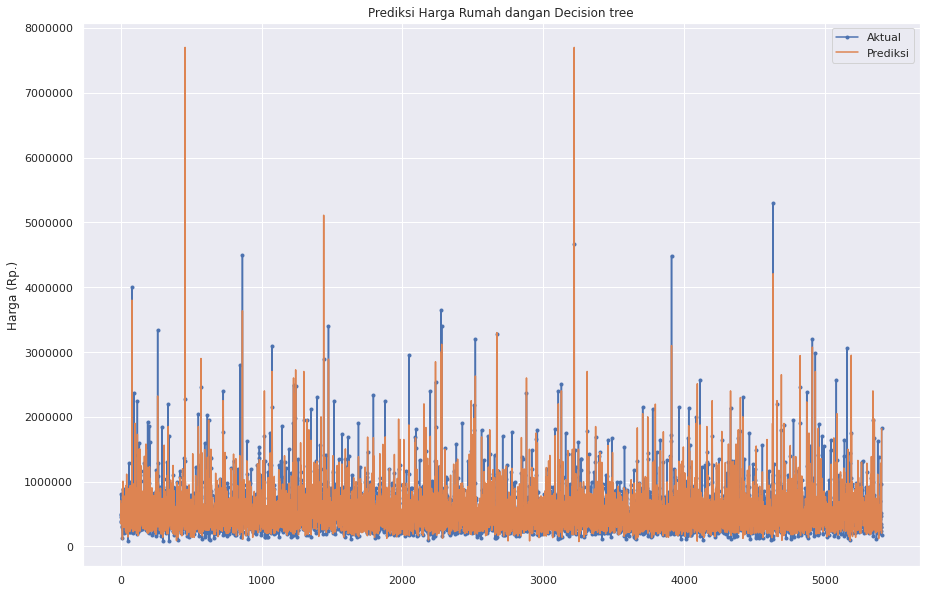

In [64]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), dt_pred.flatten(), label="Prediksi")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Rumah dangan Decision tree')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

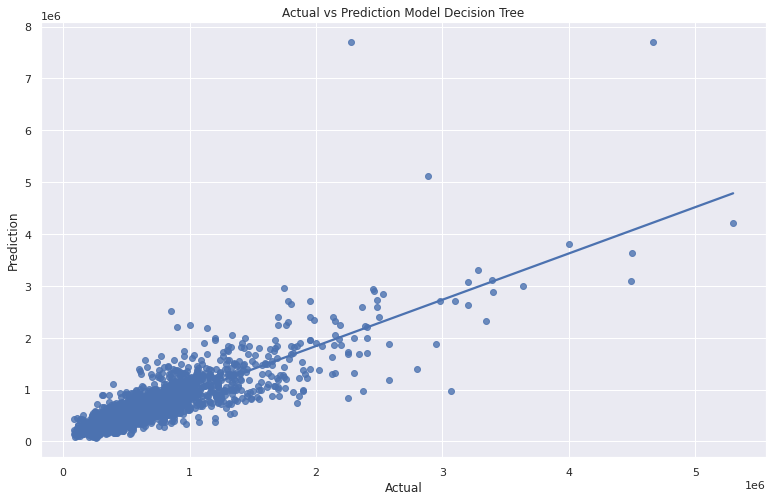

In [60]:
plt.figure(figsize = (13,8))
sns.regplot(x=y_test, y=dt_pred, ci=None)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs Prediction Model Decision Tree')
plt.show()

In [67]:
hasil_prediksi['Decisiontree'] = dt_pred.flatten()
hasil_prediksi['Decisiontree'] = hasil_prediksi['Decisiontree'].round(0)
hasil_prediksi.head(4)

,Aktual,Linear Regression,RandomForest,Decisiontree,Randomforest
0,805000.0,778069.0,741506.0,707000.0,741506.0
1,390000.0,183322.0,422794.0,379500.0,422794.0
2,379900.0,437261.0,385570.0,349900.0,385570.0
3,485000.0,507844.0,500616.0,447000.0,500616.0


# Random Forest

In [130]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=10, random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [131]:
rf_score = rf.score(x_test, y_test)
print('Model Accuracy Random Forest : ' , rf_score)

Model Accuracy Random Forest :  0.8642658442781248


In [132]:
rf_pred = rf.predict(x_test)

In [133]:
rf_mse = mean_squared_error(y_test.values, rf_pred)
rf_rmse = mean_squared_error(y_test.values, rf_pred,squared=False)
rf_mape = mean_absolute_percentage_error(y_test.values, rf_pred)
rf_mae = mean_absolute_error(y_test.values, rf_pred)
rf_r = r2_score(y_test.values, rf_pred)

print('Nilai Mean Squared Error      = {}'.format(rf_mse))
print('Nilai Root Mean Squared Error = {}'.format(rf_rmse))
print('Nilai Mean Absolute Percentage Error = {}'.format(rf_mape))
print('Nilai Mean Absolute Error     = {}'.format(rf_mae))
print('Nilai R2                      = {}'.format(rf_r))

Nilai Mean Squared Error      = 16939844449.206087
Nilai Root Mean Squared Error = 130153.15766129567
Nilai Mean Absolute Percentage Error = 0.14589443472380037
Nilai Mean Absolute Error     = 75469.09400466688
Nilai R2                      = 0.8642658442781248


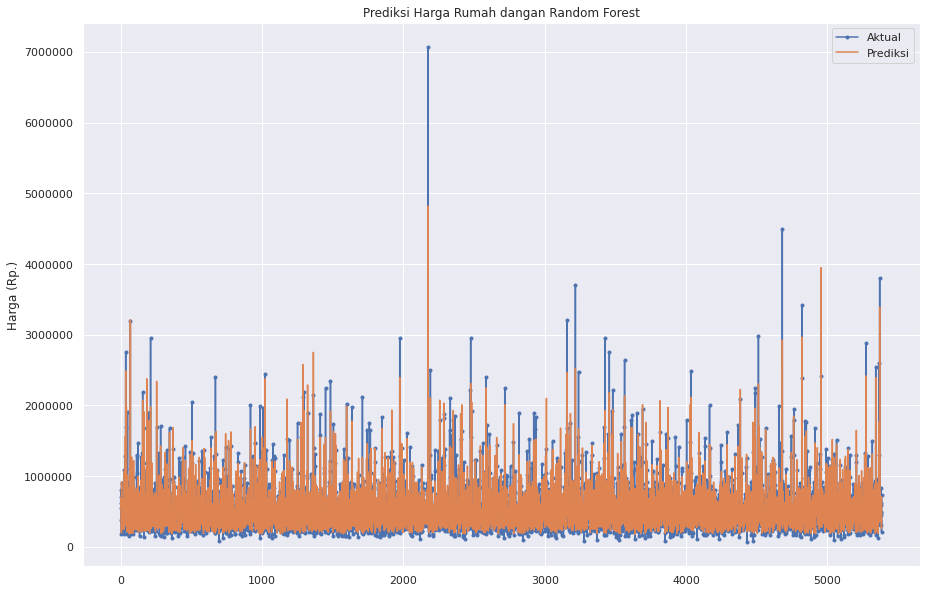

In [135]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), rf_pred.flatten(), label="Prediksi")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Rumah dangan Random Forest')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

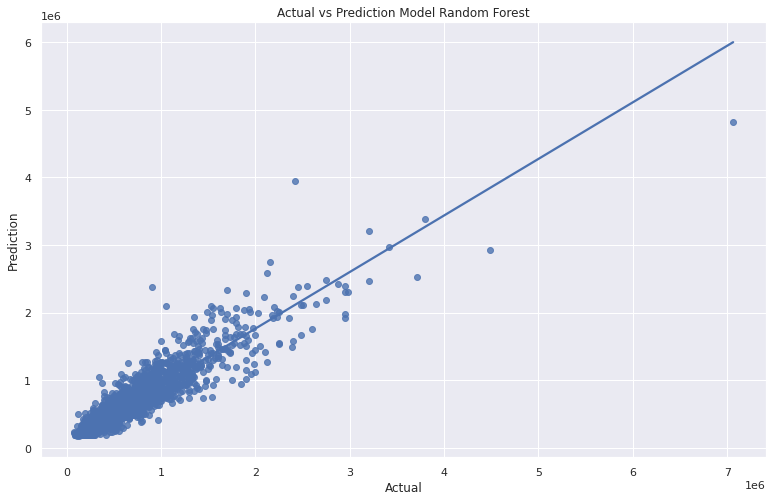

In [136]:
plt.figure(figsize = (13,8))
sns.regplot(x=y_test, y=rf_pred, ci=None)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs Prediction Model Random Forest')
plt.show()

In [66]:
hasil_prediksi['Randomforest'] = rf_pred.flatten()
hasil_prediksi['Randomforest'] = hasil_prediksi['Randomforest'].round(0)
hasil_prediksi.head(4)

,Aktual,Linear Regression,RandomForest,Decisiontree,Randomforest
0,805000.0,778069.0,741506.0,707000.0,741506.0
1,390000.0,183322.0,422794.0,379500.0,422794.0
2,379900.0,437261.0,385570.0,349900.0,385570.0
3,485000.0,507844.0,500616.0,447000.0,500616.0




## Deep Neural Network

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [95]:
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
507/507 - 2s - loss: 361622994944.0000 - val_loss: 299039195136.0000 - 2s/epoch - 3ms/step
Epoch 2/500
507/507 - 1s - loss: 244993671168.0000 - val_loss: 168861220864.0000 - 963ms/epoch - 2ms/step
Epoch 3/500
507/507 - 1s - loss: 114467864576.0000 - val_loss: 80462454784.0000 - 942ms/epoch - 2ms/step
Epoch 4/500
507/507 - 1s - loss: 79809970176.0000 - val_loss: 75548073984.0000 - 944ms/epoch - 2ms/step
Epoch 5/500
507/507 - 1s - loss: 76279095296.0000 - val_loss: 72633688064.0000 - 1s/epoch - 2ms/step
Epoch 6/500
507/507 - 1s - loss: 74038747136.0000 - val_loss: 70750789632.0000 - 921ms/epoch - 2ms/step
Epoch 7/500
507/507 - 1s - loss: 72160862208.0000 - val_loss: 69201436672.0000 - 1s/epoch - 2ms/step
Epoch 8/500
507/507 - 1s - loss: 70707691520.0000 - val_loss: 67812446208.0000 - 1s/epoch - 2ms/step
Epoch 9/500
507/507 - 1s - loss: 69443043328.0000 - val_loss: 66792337408.0000 - 1s/epoch - 2ms/step
Epoch 10/500
507/507 - 1s - loss: 68350963712.0000 - val_loss: 65923710976

In [96]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 25)                450       
                                                                 
 dense_25 (Dense)            (None, 10)                260       
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


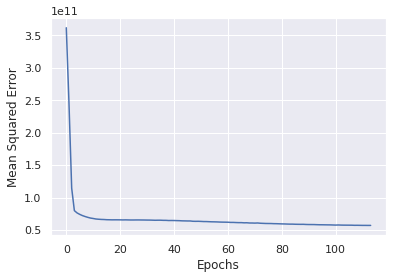

In [97]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [99]:
dnn_pred = model.predict(x_test)

In [100]:
dnn_mse = mean_squared_error(y_test.values, dnn_pred)
dnn_rmse = mean_squared_error(y_test.values, dnn_pred,squared=False)
dnn_mape = mean_absolute_percentage_error(y_test.values, dnn_pred)
dnn_mae = mean_absolute_error(y_test.values, dnn_pred)
dnn_r = r2_score(y_test.values, dnn_pred)

print('Nilai Mean Squared Error      = {}'.format(dnn_mse))
print('Nilai Root Mean Squared Error = {}'.format(dnn_rmse))
print('Nilai Mean Absolute Percentage Error = {}'.format(dnn_mape))
print('Nilai Mean Absolute Error     = {}'.format(dnn_mae))
print('Nilai R2                      = {}'.format(dnn_r))

Nilai Mean Squared Error      = 57483557374.02565
Nilai Root Mean Squared Error = 239757.28846903832
Nilai Mean Absolute Percentage Error = 0.32915370468059724
Nilai Mean Absolute Error     = 158275.75239405996
Nilai R2                      = 0.5640159966514781


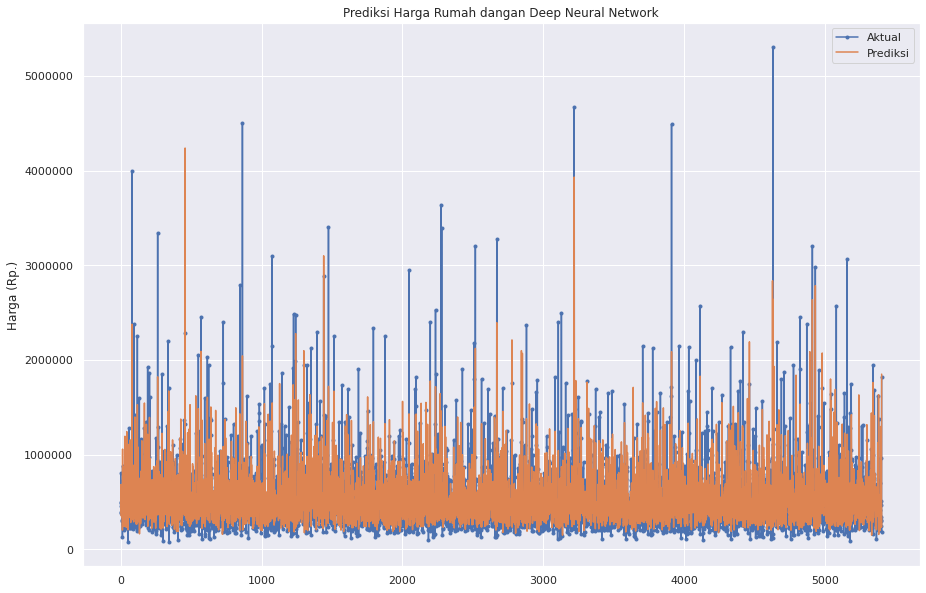

In [102]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), dnn_pred.flatten(), label="Prediksi")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Rumah dangan Deep Neural Network')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

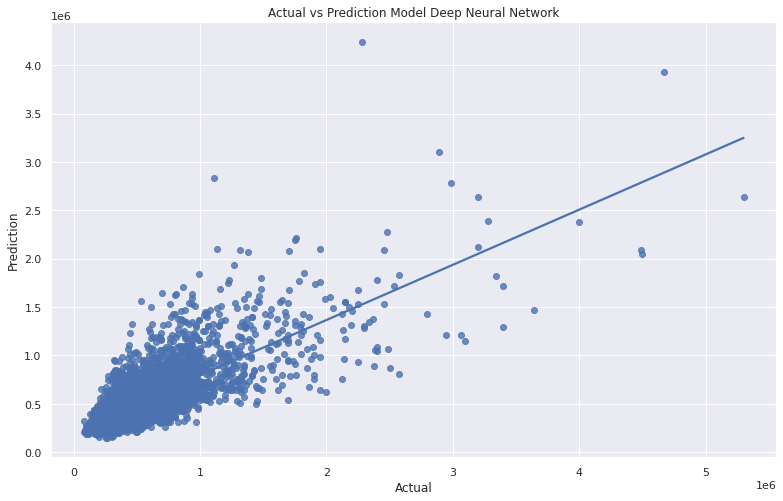

In [103]:
plt.figure(figsize = (13,8))
sns.regplot(x=y_test, y=dnn_pred, ci=None)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs Prediction Model Deep Neural Network')
plt.show()

In [107]:
hasil_prediksi['DeepNeuralNetwork'] = dt_pred.flatten()
hasil_prediksi['DeepNeuralNetwork'] = hasil_prediksi['DeepNeuralNetwork'].round(0)
hasil_prediksi.head(10)

,Aktual,Linear Regression,RandomForest,Decisiontree,Randomforest,DeepNeuralNetwork
0,805000.0,778069.0,741506.0,707000.0,741506.0,707000.0
1,390000.0,183322.0,422794.0,379500.0,422794.0,379500.0
2,379900.0,437261.0,385570.0,349900.0,385570.0,349900.0
3,485000.0,507844.0,500616.0,447000.0,500616.0,447000.0
4,455000.0,415499.0,488182.0,523950.0,488182.0,523950.0
5,500000.0,812963.0,668820.0,600000.0,668820.0,600000.0
6,545000.0,449950.0,488884.0,537000.0,488884.0,537000.0
7,649000.0,1377615.0,592603.0,655000.0,592603.0,655000.0
8,500000.0,862239.0,717401.0,659000.0,717401.0,659000.0
9,568000.0,434549.0,540103.0,568000.0,540103.0,568000.0


## Perbandingan

In [106]:
print('Nilai MSE LinearRegression  = {}'.format(lr_mse))
print('Nilai MSE DecisionTree      = {}'.format(dt_mse))
print('Nilai MSE RandomForest      = {}'.format(rf_mse))
print('Nilai MSE DNN               = {}'.format(dnn_mse))
print('========================================================')
print('Nilai RMSE LinearRegression = {}'.format(lr_rmse))
print('Nilai RMSE DecisionTree     = {}'.format(dt_rmse))
print('Nilai RMSE RandomForest     = {}'.format(rf_rmse))
print('Nilai RMSE DNN              = {}'.format(dnn_rmse))
print('========================================================')
print('Nilai MAPE LinearRegression  = {}'.format(lr_mape))
print('Nilai MAPE DecisionTree      = {}'.format(dt_mape))
print('Nilai MAPE RandomForest      = {}'.format(rf_mape))
print('Nilai MAPE DNN               = {}'.format(dnn_mape))
print('========================================================')
print('Nilai MAE LinearRegression  = {}'.format(lr_mae))
print('Nilai MAE DecisionTree      = {}'.format(dt_mae))
print('Nilai MAE RandomForest      = {}'.format(rf_mae))
print('Nilai MAE DNN               = {}'.format(dnn_mae))
print('========================================================')
print('Nilai R2 Linear Regression  = {}'.format(lr_r))
print('Nilai R2 DecisionTree       = {}'.format(dt_r))
print('Nilai R2 RandomForest       = {}'.format(rf_r))
print('Nilai R2 DNN                = {}'.format(dnn_r))

Nilai MSE LinearRegression  = 37900141629.61991
Nilai MSE DecisionTree      = 35171293835.44153
Nilai MSE RandomForest      = 21216787700.193775
Nilai MSE DNN               = 57483557374.02565
Nilai RMSE LinearRegression = 194679.58709022347
Nilai RMSE DecisionTree     = 187540.11260378812
Nilai RMSE RandomForest     = 145659.83557657126
Nilai RMSE DNN              = 239757.28846903832
Nilai MAPE LinearRegression  = 0.25623056905087394
Nilai MAPE DecisionTree      = 0.18244936790724134
Nilai MAPE RandomForest      = 0.14487868404039156
Nilai MAPE DNN               = 0.32915370468059724
Nilai MAE LinearRegression  = 124566.08958973883
Nilai MAE DecisionTree      = 97171.27387120652
Nilai MAE RandomForest      = 76423.54441004543
Nilai MAE DNN               = 158275.75239405996
Nilai R2 Linear Regression  = 0.7125464005708164
Nilai R2 DecisionTree       = 0.7332433448829696
Nilai R2 RandomForest       = 0.8390812875490911
Nilai R2 DNN                = 0.5640159966514781


Dari data diatas, dapat dilihat model yang membeikan nilai terbaik adalah model Random Forest. Hal ini ditandai dengan nilai Mean Squared Error, Root Mean Squared Error, Mean Absolute Percentage Error, Mean Absolute Error dan R Squared Error paling sedikit diantara model yang lain